In [2]:
import random
import math 
import pylab

In [6]:
def direct_pi(N):
    n_hits = 0
    for i in range(N):
        x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
        if x ** 2 + y ** 2 < 1.0:
            n_hits += 1
    return n_hits

n_runs = 500
n_trials_list = []
sigmasqs = []
for poweroftwo in range(4, 13):
    n_trials = 2 ** poweroftwo
    sigmasq = 0.0
    for run in range(n_runs):
        pi_est = 4.0 * direct_pi(n_trials) / float(n_trials)
        sigmasq += (pi_est - math.pi) ** 2
    sigmasqs.append(math.sqrt(sigmasq/(n_runs)))
    n_trials_list.append(n_trials)

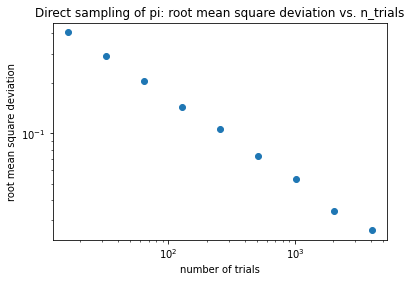

In [7]:
pylab.plot(n_trials_list, sigmasqs, 'o')
pylab.xscale('log')
pylab.yscale('log')
pylab.xlabel('number of trials')
pylab.ylabel('root mean square deviation')
pylab.title('Direct sampling of pi: root mean square deviation vs. n_trials')
pylab.savefig('direct_sampling_rms_deviation.png')
pylab.show()

0 4.818873586656932
1 4.18460445453475
8 4.0426041365381
32 3.860125933034019
59 3.566389908879529
1811 3.541673823408693
3881 3.3119657222465895
6921 3.111024301748857
13090 3.0038195741738227
22482 2.812802184648819
95313 2.7771400994830526


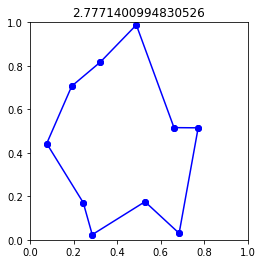

In [18]:
import random, math, pylab

def dist(x, y):
    return math.sqrt((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2)

def tour_length(cities, N):
    return sum(dist(cities[k + 1], cities[k]) for k in range(N - 1)) + dist(cities[0], cities[N - 1])

N = 10
random.seed(54321)
cities = [(random.uniform(0.0, 1.0), random.uniform(0.0, 1.0)) for i in range(N)]
random.seed()
energy_min = float('inf')
for sample in range(1000000):
    random.shuffle(cities)
    energy =  tour_length(cities, N)
    if energy < energy_min:
        print(sample, energy)
        energy_min = energy
        new_cities = cities[:]
cities = new_cities[:]
for i in range(1,N):
    pylab.plot([cities[i][0], cities[i - 1][0]], [cities[i][1], cities[i - 1][1]], 'bo-')
pylab.plot([cities[0][0], cities[N - 1][0]], [cities[0][1], cities[N - 1][1]], 'bo-')
pylab.title(str(energy_min))
pylab.axis('scaled')
pylab.axis([0.0, 1.0, 0.0, 1.0])
pylab.savefig('plot_tsp_direct_sampling_N' + str(N) + '_energy' + str(energy_min) + '.png')
pylab.show()